In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir = '/mnt/share/costeffectiveness/results/vivarium_ciff_sam/v7.0.0_full_model_no_x_factor/ciff_sam/2022_03_04_17_34_48/count_data/'

In [3]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'diarrhea_transition_count.csv',
 'wasting_transition_count.csv',
 'diarrhea_state_person_time.hdf',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'diarrhea_state_person_time.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'diarrhea_transition_count.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# wasting treatment

In [4]:
# start with wasting treatment

wasting_transition_count = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transition_count.head()

,sex,year,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,female,2022,mild_child_wasting_to_moderate_acute_malnutrit...,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [5]:
mam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                            'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count']))
              &(wasting_transition_count.mam_treatment=='covered')]
          .groupby(['input_draw','scenario','year']).sum())
mam_cases = (wasting_transition_count
          .loc[(wasting_transition_count.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                            'severe_acute_malnutrition_to_moderate_acute_malnutrition_event_count']))]
          .groupby(['input_draw','scenario','year']).sum())
mam_tx = (mam_tx / mam_cases).reset_index()
mam_tx['intervention'] = 'MAM treatment'
mam_tx

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.153393,MAM treatment
1,29,baseline,2023,0.154203,MAM treatment
2,29,baseline,2024,0.150349,MAM treatment
3,29,baseline,2025,0.153846,MAM treatment
4,29,baseline,2026,0.152656,MAM treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.129186,MAM treatment
326,946,zinc_supplementation,2023,0.222869,MAM treatment
327,946,zinc_supplementation,2024,0.411345,MAM treatment
328,946,zinc_supplementation,2025,0.602113,MAM treatment


In [6]:
sam_tx = (wasting_transition_count
          .loc[(wasting_transition_count.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count')
              &(wasting_transition_count.sam_treatment=='covered')]
          .groupby(['input_draw','scenario','year']).sum())
sam_cases = (wasting_transition_count
          .loc[(wasting_transition_count.measure=='moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count')]
          .groupby(['input_draw','scenario','year']).sum())
sam_tx = (sam_tx/sam_cases).reset_index()
sam_tx['intervention'] = 'SAM treatment'
sam_tx

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.509921,SAM treatment
1,29,baseline,2023,0.503773,SAM treatment
2,29,baseline,2024,0.507606,SAM treatment
3,29,baseline,2025,0.497878,SAM treatment
4,29,baseline,2026,0.494211,SAM treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.432086,SAM treatment
326,946,zinc_supplementation,2023,0.485669,SAM treatment
327,946,zinc_supplementation,2024,0.562008,SAM treatment
328,946,zinc_supplementation,2025,0.651232,SAM treatment


# sqlns

In [7]:
pt = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,diarrhea,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [8]:
pt.age.unique()

array(['early_neonatal', 'late_neonatal', '1-5_months', '6-11_months',
       '12_to_23_months', '2_to_4'], dtype=object)

In [9]:
sqlns = (pt.loc[(pt.age.isin(['6-11_months',
       '12_to_23_months', '2_to_4']))
               &(pt.sq_lns=='covered')]
         .groupby(['input_draw','scenario','year']).sum())[['value']]
sqlns_tot = (pt.loc[(pt.age.isin(['6-11_months',
       '12_to_23_months', '2_to_4']))]
         .groupby(['input_draw','scenario','year']).sum())[['value']]
sqlns = (sqlns/sqlns_tot).reset_index()
sqlns['intervention'] = 'SQ-LNS'
sqlns

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.000000,SQ-LNS
1,29,baseline,2023,0.000000,SQ-LNS
2,29,baseline,2024,0.000000,SQ-LNS
3,29,baseline,2025,0.000000,SQ-LNS
4,29,baseline,2026,0.000000,SQ-LNS
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.000000,SQ-LNS
326,946,zinc_supplementation,2023,0.150110,SQ-LNS
327,946,zinc_supplementation,2024,0.448988,SQ-LNS
328,946,zinc_supplementation,2025,0.750546,SQ-LNS


# lbwsg

In [10]:
births = pd.read_csv(output_dir + 'births.csv')
births.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,insecticide_treated_nets,maternal_supplementation,maternal_malnutrition
0,0,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,bep,cat2
1,1,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,bep,cat2
2,2,female,2022,birth_weight_sum,29,baseline,0.000000e+00,covered,mmn,cat2
3,3,female,2022,birth_weight_sum,29,baseline,0.000000e+00,uncovered,mmn,cat2
4,4,female,2022,birth_weight_sum,29,baseline,4.489095e+06,covered,ifa,cat2


In [11]:
births.measure.unique()

array(['birth_weight_sum', 'low_weight_births', 'total_births'],
      dtype=object)

In [12]:
supplementation = (births.loc[(births.measure=='total_births')]
                   .groupby(['input_draw','scenario','year','maternal_supplementation']).sum()
                   [['value']]
                  )
supplementation_tot = (births.loc[(births.measure=='total_births')]
                   .groupby(['input_draw','scenario','year']).sum()
                   [['value']]
                  )

supplementation = (supplementation / supplementation_tot).reset_index().rename(columns={'maternal_supplementation':'intervention'})
supplementation = supplementation.loc[supplementation.intervention!='uncovered']
supplementation

,input_draw,scenario,year,intervention,value
0,29,baseline,2022,bep,0.000000
1,29,baseline,2022,ifa,0.592735
2,29,baseline,2022,mmn,0.000000
4,29,baseline,2023,bep,0.000000
5,29,baseline,2023,ifa,0.595205
...,...,...,...,...,...
1313,946,zinc_supplementation,2025,ifa,0.000000
1314,946,zinc_supplementation,2025,mmn,0.574161
1316,946,zinc_supplementation,2026,bep,0.203891
1317,946,zinc_supplementation,2026,ifa,0.000000


In [13]:
supplementation_alt = (births.loc[(births.measure=='total_births')&(births.maternal_supplementation!='uncovered')]
                   .groupby(['input_draw','scenario','year']).sum()
                   [['value']]
                  )

supplementation_alt = (supplementation_alt / supplementation_tot).reset_index().rename(columns={'maternal_supplementation':'intervention'})
supplementation_alt['intervention'] = 'Antenatal supplementation'
supplementation_alt

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.592735,Antenatal supplementation
1,29,baseline,2023,0.595205,Antenatal supplementation
2,29,baseline,2024,0.597149,Antenatal supplementation
3,29,baseline,2025,0.593638,Antenatal supplementation
4,29,baseline,2026,0.593910,Antenatal supplementation
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.578080,Antenatal supplementation
326,946,zinc_supplementation,2023,0.575797,Antenatal supplementation
327,946,zinc_supplementation,2024,0.581744,Antenatal supplementation
328,946,zinc_supplementation,2025,0.747838,Antenatal supplementation


In [14]:
itns = (births.loc[(births.measure=='total_births')
                              &(births.insecticide_treated_nets=='covered')]
                   .groupby(['input_draw','scenario','year']).sum()
                   [['value']])
itns = (itns / supplementation_tot).reset_index()
itns['intervention'] = 'ITNs during pregnancy'
itns

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.277930,ITNs during pregnancy
1,29,baseline,2023,0.278331,ITNs during pregnancy
2,29,baseline,2024,0.273981,ITNs during pregnancy
3,29,baseline,2025,0.279570,ITNs during pregnancy
4,29,baseline,2026,0.285490,ITNs during pregnancy
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.258502,ITNs during pregnancy
326,946,zinc_supplementation,2023,0.301947,ITNs during pregnancy
327,946,zinc_supplementation,2024,0.400329,ITNs during pregnancy
328,946,zinc_supplementation,2025,0.486385,ITNs during pregnancy


In [15]:
itns_alt = (births.loc[(births.measure=='total_births')
                              &(births.insecticide_treated_nets=='covered')]
                   .groupby(['input_draw','scenario','year']).sum()
                   [['value']])
itns_alt = (itns_alt / supplementation_tot/0.6).reset_index() 
itns_alt['intervention'] = 'ITNs during pregnancy'
itns_alt

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.463217,ITNs during pregnancy
1,29,baseline,2023,0.463885,ITNs during pregnancy
2,29,baseline,2024,0.456636,ITNs during pregnancy
3,29,baseline,2025,0.465951,ITNs during pregnancy
4,29,baseline,2026,0.475817,ITNs during pregnancy
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.430836,ITNs during pregnancy
326,946,zinc_supplementation,2023,0.503244,ITNs during pregnancy
327,946,zinc_supplementation,2024,0.667215,ITNs during pregnancy
328,946,zinc_supplementation,2025,0.810642,ITNs during pregnancy


# zinc

In [16]:
dt = pd.read_csv(output_dir + 'diarrhea_transition_count.csv')
ther_zinc = dt.loc[(dt.therapeutic_zinc=='covered')
                         &(dt.measure=='susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count')]
ther_zinc = ther_zinc.groupby(['input_draw','scenario','year']).sum()[['value']]
ther_zinc_tot = dt.loc[(dt.measure=='susceptible_to_diarrheal_diseases_to_diarrheal_diseases_event_count')]
ther_zinc_tot = ther_zinc_tot.groupby(['input_draw','scenario','year']).sum()[['value']]
ther_zinc = (ther_zinc/ther_zinc_tot).reset_index()

ther_zinc['intervention'] = 'Therapeutic zinc'
ther_zinc

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.207017,Therapeutic zinc
1,29,baseline,2023,0.206150,Therapeutic zinc
2,29,baseline,2024,0.208077,Therapeutic zinc
3,29,baseline,2025,0.206653,Therapeutic zinc
4,29,baseline,2026,0.206706,Therapeutic zinc
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.399521,Therapeutic zinc
326,946,zinc_supplementation,2023,0.473667,Therapeutic zinc
327,946,zinc_supplementation,2024,0.630956,Therapeutic zinc
328,946,zinc_supplementation,2025,0.799228,Therapeutic zinc


In [17]:
dpt = pd.read_csv(output_dir + 'diarrhea_state_person_time.csv')
prev_zinc = dpt.loc[(dpt.preventative_zinc=='covered')]
prev_zinc = prev_zinc.groupby(['input_draw','scenario','year']).sum()[['value']]

prev_zinc = (prev_zinc / dpt.groupby(['input_draw','scenario','year']).sum()[['value']]).reset_index()
prev_zinc['intervention'] = 'Preventative zinc'
prev_zinc

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.000000,Preventative zinc
1,29,baseline,2023,0.000000,Preventative zinc
2,29,baseline,2024,0.000000,Preventative zinc
3,29,baseline,2025,0.000000,Preventative zinc
4,29,baseline,2026,0.000000,Preventative zinc
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.000000,Preventative zinc
326,946,zinc_supplementation,2023,0.149906,Preventative zinc
327,946,zinc_supplementation,2024,0.450259,Preventative zinc
328,946,zinc_supplementation,2025,0.751682,Preventative zinc


# all interventions


This dataframe gives us the total ANNUAL number of services provided for each intervention in each simulated scenario, by draw. This should be compared with simulation outcomes in count space to calculate ICERs (or converted to rate space to calculate costs per population size). 

Note:

- SQ-LNS and prevenative zinc are measures of person-time rather than counts... it is equivalent to the count of yearly provisions
- For maternal supplementation and insecticide treated nets, we consider coverage only among live births. However, this will be an underestimate of total population coverage of these interventions given that some mothers covered by the interventions will result in stillbirths. We should consider either: a) noting this in our limitations, or b) incorporating this into our cost model using the stillbirth to live birth ratio covariate
    - Also, we do not consider the delay in coverage to account for gestation

In [18]:
data = pd.concat([sam_tx,
                 mam_tx,
                 sqlns,
                 supplementation_alt,
                 itns_alt,
                 prev_zinc,
                 ther_zinc])
data

,input_draw,scenario,year,value,intervention
0,29,baseline,2022,0.509921,SAM treatment
1,29,baseline,2023,0.503773,SAM treatment
2,29,baseline,2024,0.507606,SAM treatment
3,29,baseline,2025,0.497878,SAM treatment
4,29,baseline,2026,0.494211,SAM treatment
...,...,...,...,...,...
325,946,zinc_supplementation,2022,0.399521,Therapeutic zinc
326,946,zinc_supplementation,2023,0.473667,Therapeutic zinc
327,946,zinc_supplementation,2024,0.630956,Therapeutic zinc
328,946,zinc_supplementation,2025,0.799228,Therapeutic zinc


In [19]:
cov = data.groupby(['scenario','year','intervention']).describe(percentiles=[0.025,0.975])[['value']].reset_index()
cov

scenario  year               intervention value            \
                                                           count      mean   
0                baseline  2022  Antenatal supplementation  11.0  0.594935   
1                baseline  2022      ITNs during pregnancy  11.0  0.443805   
2                baseline  2022              MAM treatment  11.0  0.139680   
3                baseline  2022          Preventative zinc  11.0  0.000000   
4                baseline  2022              SAM treatment  11.0  0.459532   
..                    ...   ...                        ...   ...       ...   
205  zinc_supplementation  2026              MAM treatment  11.0  0.699608   
206  zinc_supplementation  2026          Preventative zinc  11.0  0.900131   
207  zinc_supplementation  2026              SAM treatment  11.0  0.701166   
208  zinc_supplementation  2026                     SQ-LNS  11.0  0.900112   
209  zinc_supplementation  2026           Therapeutic zinc  11.0  0.887187   

                                                                 
          std       min      2.5%       50%     97.5%       max  
0    0.008611  0.578080  0.580649  0.596916  0.607194  0.609119  
1    0.018897  0.409098  0.412040  0.445674  0.466239  0.467246  
2    0.025026  0.082177  0.089943  0.143579  0.166427  0.166768  
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4    0.062026  0.318702  0.337441  0.469810  0.518969  0.519345  
..        ...       ...       ...       ...       ...       ...  
205  0.002648  0.695222  0.695234  0.699616  0.703323  0.703571  
206  0.000689  0.898854  0.899018  0.900077  0.901220  0.901328  
207  0.006865  0.691304  0.691623  0.701508  0.713207  0.715701  
208  0.001488  0.897570  0.897744  0.900121  0.902058  0.902146  
209  0.005161  0.878317  0.878961  0.887929  0.894437  0.894644  

[210 rows x 11 columns]

In [30]:
scenarios = ['baseline',
            'sam_treatment',
            'mam_treatment',
            'sqlns',
            'lbwsg_interventions',
             'zinc_supplementation'
            ]

scenario_names = ['Baseline scenario',
                 'SAM treatment scenario',
                 'MAM treatment scenario',
                 'SQ-LNS scenario',
                 'LBWSG interventions scenario',
                 'Zinc supplementation scenario']

interventions = ['SAM treatment',
                 'MAM treatment',
                 'SQ-LNS',
                 'Antenatal supplementation',
                 'ITNs during pregnancy',
                 'Therapeutic zinc',
                 'Preventative zinc'
                ]

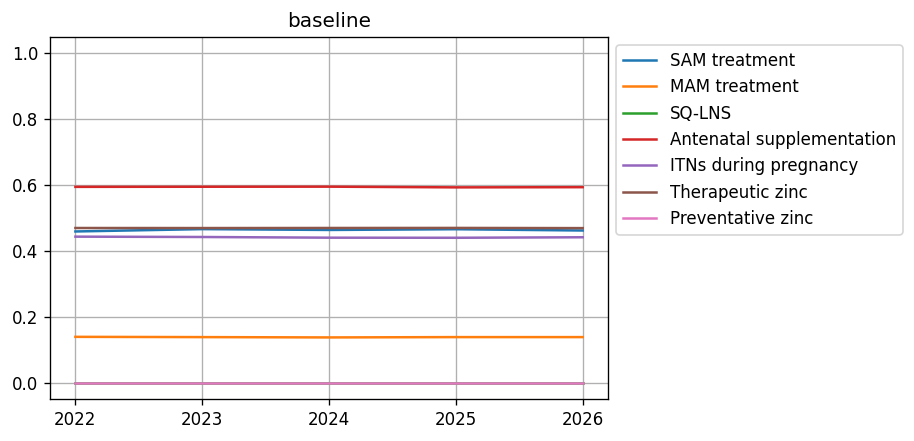

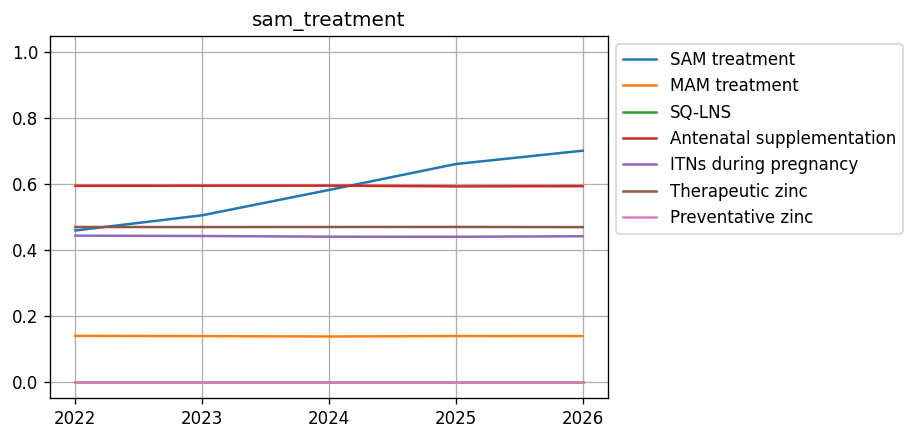

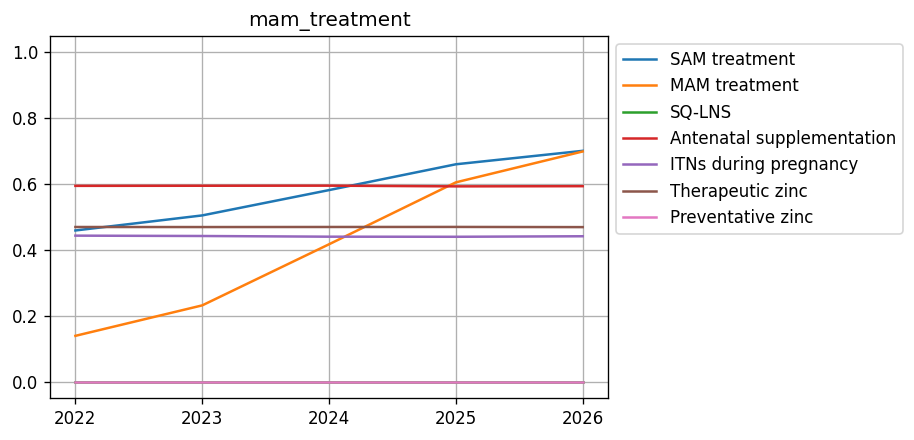

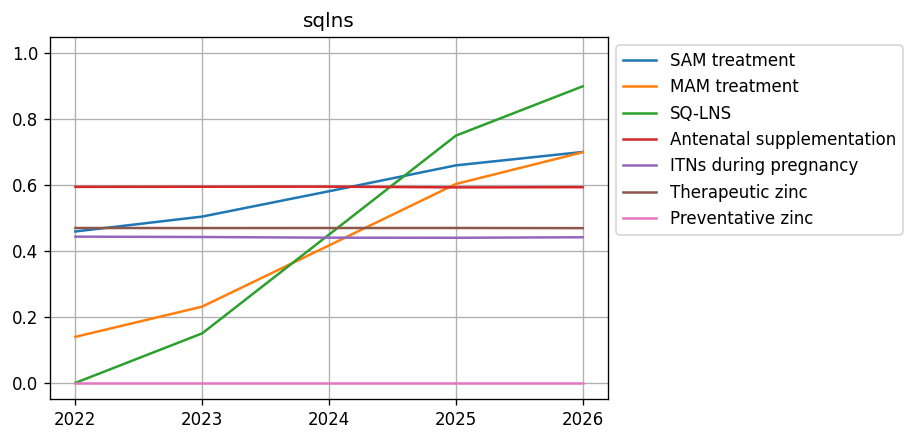

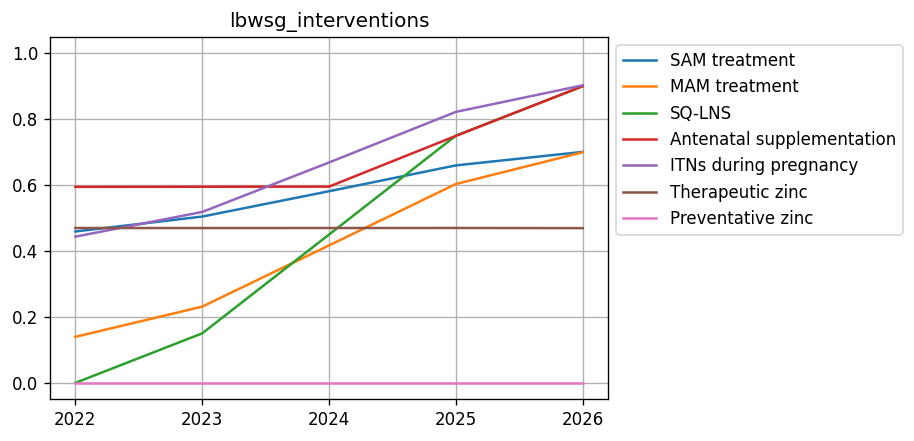

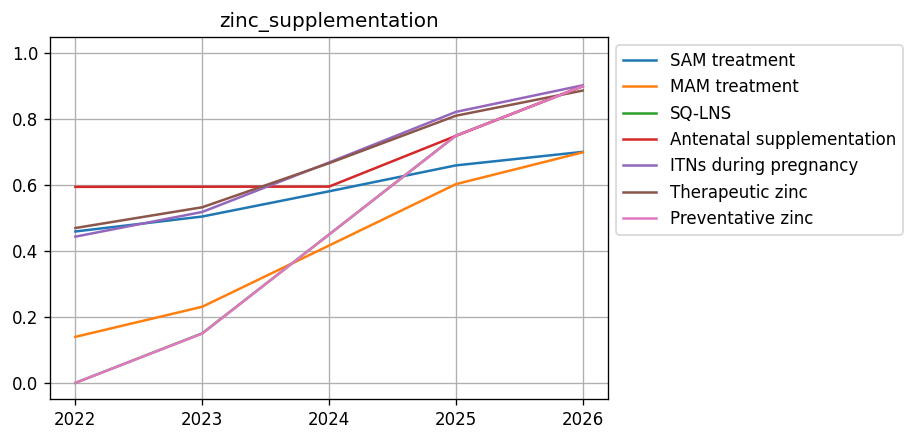

In [21]:
for scenario in scenarios:
    plt.figure(dpi=120)
    p = cov.loc[cov.scenario==scenario]
    for intervention in interventions:
        p_sub = p.loc[p.intervention==intervention]
        plt.plot(p_sub.year,p_sub['value','mean'], label=intervention)
    plt.legend(bbox_to_anchor=[1,1])
    plt.ylim(-0.05,1.05)
    plt.grid()
    plt.title(scenario)
    plt.xticks(p_sub.year)

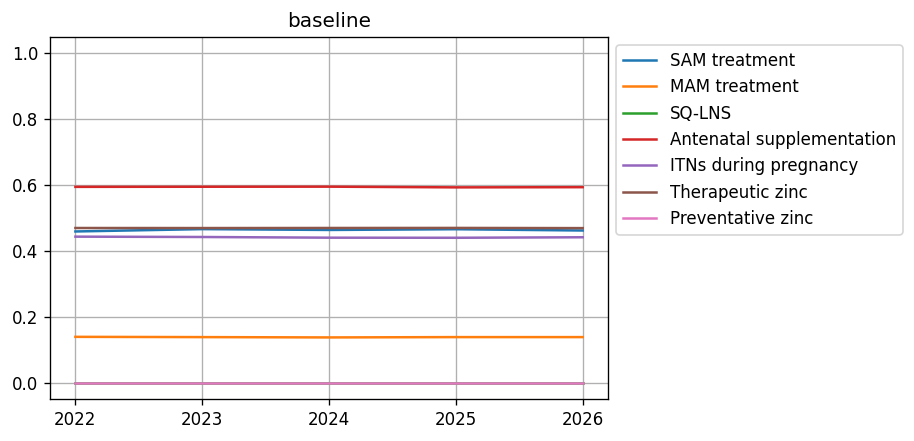

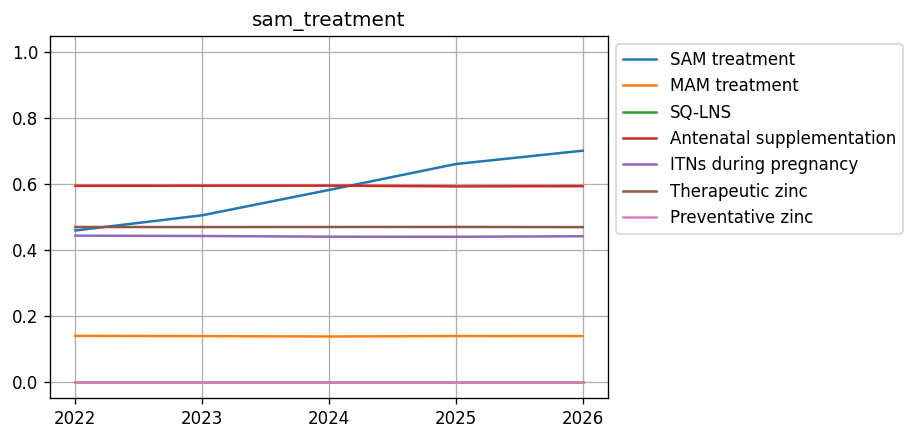

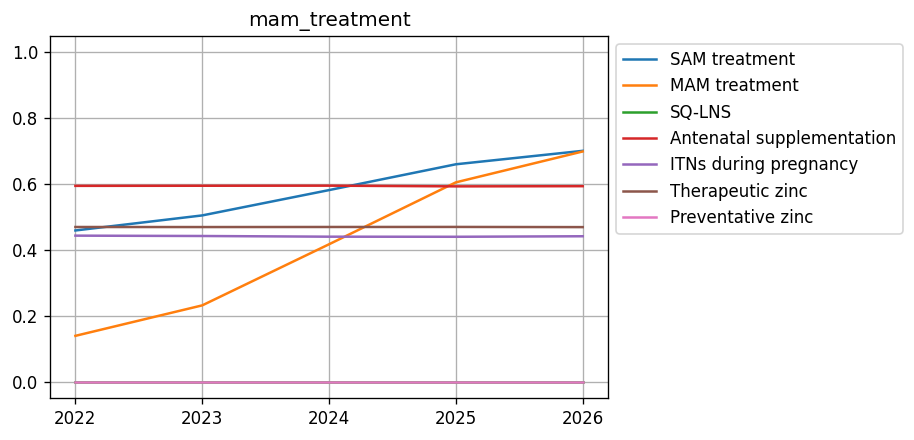

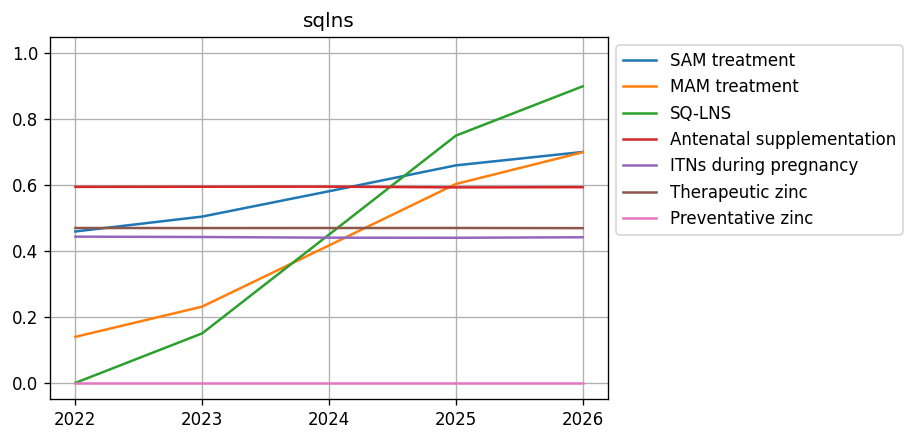

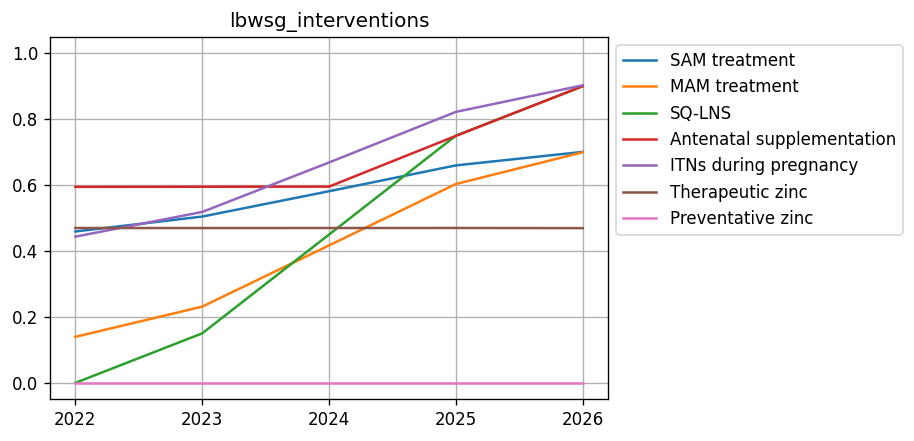

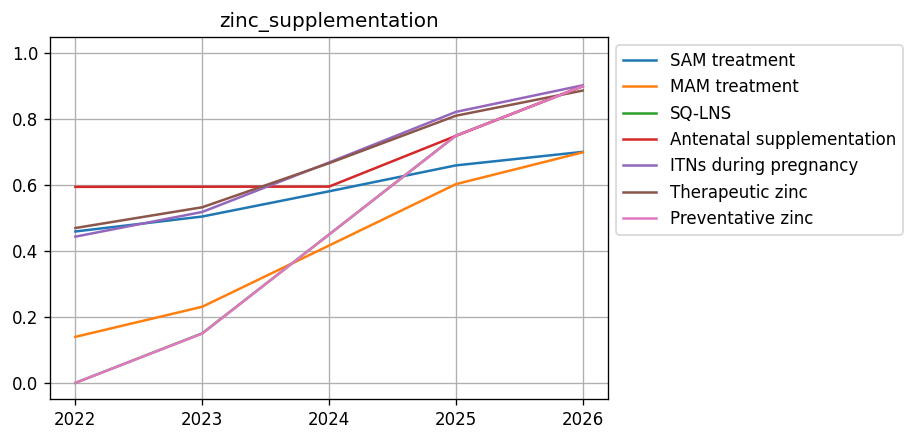

In [22]:
for scenario in scenarios:
    plt.figure(dpi=120)
    p = cov.loc[cov.scenario==scenario]
    for intervention in interventions:
        p_sub = p.loc[p.intervention==intervention]
        plt.plot(p_sub.year,p_sub['value','mean'], label=intervention)
    plt.legend(bbox_to_anchor=[1,1])
    plt.ylim(-0.05,1.05)
    plt.grid()
    plt.title(scenario)
    plt.xticks(p_sub.year)

In [23]:
def bar_plot_coverage(scenario, highlighted_interventions):
    pp = cov.loc[cov.scenario==scenario]
    bar_width = 0.13
    plt.figure(dpi=120)
    for i in list(range(0,len(interventions))):
        p = pp.loc[pp.intervention==interventions[i]]
        x = [x+bar_width*i for x in np.arange(5)]
        if interventions[i] in highlighted_interventions:
            plt.bar(x, p['value','mean']*100, width=bar_width, label=interventions[i])
        else:
            plt.bar(x, p['value','mean']*100, width=bar_width, label=interventions[i],
                   alpha=0.5)
    #plt.legend(bbox_to_anchor=[1,1])
    plt.ylim(0,100)
    plt.ylabel('Percent of eligible population covered')
    plt.xticks([x+bar_width*2.5 for x in np.arange(5)],[2022,2023,2024,2025,2026])
    plt.title(f'{scenario_names[scenarios.index(scenario)]} scenario')

In [31]:
scenarios = ['baseline',
            'sam_treatment',
            'mam_treatment',
            'sqlns',
            'lbwsg_interventions',
             'zinc_supplementation'
            ]

scenario_names = ['Baseline scenario',
                 'SAM treatment scenario',
                 'MAM treatment scenario',
                 'SQ-LNS scenario',
                 'LBWSG interventions scenario',
                 'Zinc supplementation scenario']

interventions = ['SAM treatment',
                 'MAM treatment',
                 'SQ-LNS',
                 'Antenatal supplementation',
                 'ITNs during pregnancy',
                 'Therapeutic zinc',
                 'Preventative zinc'
                ]

<ipython-input-32-cb15db42a58f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp['scenario_order'] = np.where(pp.scenario=='baseline',0,


Text(0.5, 1.0, 'Target intervention coverage by scenario')

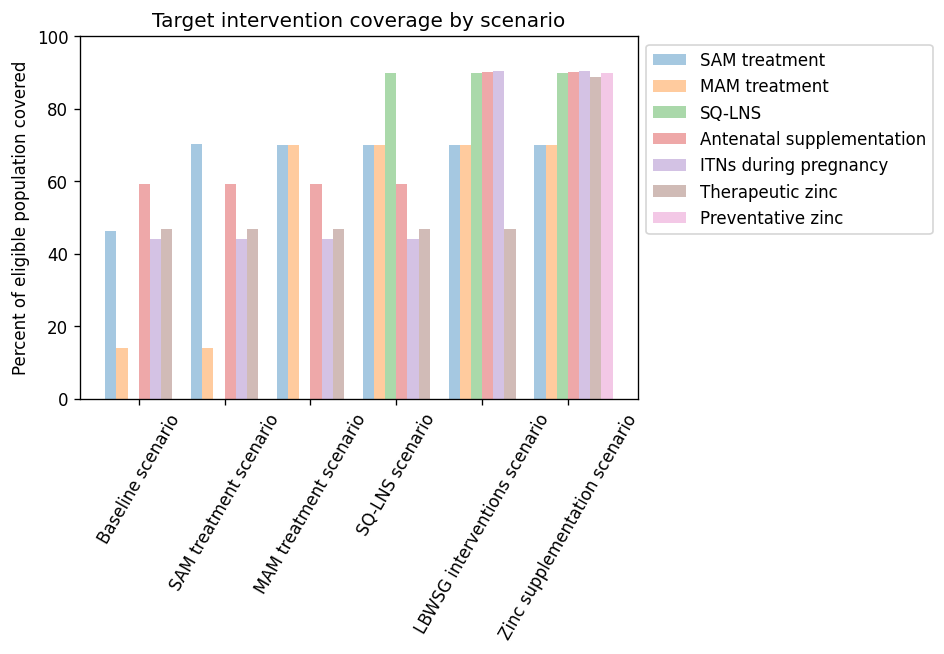

In [32]:
pp = cov.loc[cov.year==2026]
pp['scenario_order'] = np.where(pp.scenario=='baseline',0,
                              np.where(pp.scenario=='sam_treatment',1,
                                      np.where(pp.scenario=='mam_treatment',2,
                                              np.where(pp.scenario=='sqlns',3,
                                                      np.where(pp.scenario=='lbwsg_interventions',4,5)))))
pp = pp.sort_values(by='scenario_order').drop(columns='scenario_order')
bar_width = 0.13
plt.figure(dpi=120)
for i in list(range(0,len(interventions))):
    p = pp.loc[pp.intervention==interventions[i]]
    x = [x+bar_width*i for x in np.arange(len(p.scenario.unique()))]
    #if interventions[i] in highlighted_interventions:
    #    plt.bar(x, p['value','mean']*100, width=bar_width, label=interventions[i])
    #else:
    plt.bar(x, p['value','mean']*100, width=bar_width, label=interventions[i],
           alpha=0.4)
plt.legend(bbox_to_anchor=[1,1])
plt.ylim(0,100)
plt.ylabel('Percent of eligible population covered')
plt.xticks([x+bar_width*2.5 for x in np.arange(len(p.scenario.unique()))],
           scenario_names, rotation=60)
plt.title('Target intervention coverage by scenario')

In [ ]:
pp = cov.loc[cov.year==2026]
pp['scenario_order'] = np.where(pp.scenario=='baseline',0,
                              np.where(pp.scenario=='sam_treatment',1,
                                      np.where(pp.scenario=='mam_treatment',2,
                                              np.where(pp.scenario=='sqlns',3,
                                                      np.where(pp.scenario=='lbwsg_interventions',4,5)))))
pp = pp.sort_values(by='scenario_order').drop(columns='scenario_order')
bar_width = 0.13
plt.figure(dpi=120)
for i in list(range(0,len(interventions))):
    p = pp.loc[pp.intervention==interventions[i]]
    x = [x+bar_width*i for x in np.arange(len(p.scenario.unique()))]
    #if interventions[i] in highlighted_interventions:
    #    plt.bar(x, p['value','mean']*100, width=bar_width, label=interventions[i])
    #else:
    plt.bar(x, p['value','mean']*100, width=bar_width, label=interventions[i],
           alpha=0.4)
plt.legend(bbox_to_anchor=[1,1])
plt.ylim(0,100)
plt.ylabel('Percent of eligible population covered')
plt.xticks([x+bar_width*2.5 for x in np.arange(len(p.scenario.unique()))],
           scenario_names, rotation=60)
plt.title('Target intervention coverage by scenario')

In [ ]:
fig, axs = plt.subplots(3, 2,dpi=250)

axs[0,0].

In [ ]:
bar_plot_coverage('baseline', ['none'])
bar_plot_coverage('sam_treatment', ['SAM treatment'])
bar_plot_coverage('mam_treatment', ['MAM treatment'])
bar_plot_coverage('sqlns', ['SQ-LNS'])
bar_plot_coverage('lbwsg_interventions', ['Antenatal supplementation','ITNs during pregnancy'])
bar_plot_coverage('zinc_supplementation', ['Therapeutic zinc','Preventative zinc'])

In [ ]:
for scenario in scenarios:
    pp = cov.loc[cov.scenario==scenario]
    bar_width = 0.14
    plt.figure(dpi=120)
    for i in list(range(0,len(interventions))):
        p = pp.loc[pp.intervention==interventions[i]]
        x = [x+bar_width*i for x in np.arange(5)]
        plt.bar(x, p['value','mean'], yerr=p['value','std'], width=bar_width, label=interventions[i])
    plt.legend(bbox_to_anchor=[1,1])
    plt.ylim(0,1)
    plt.ylabel('Proportion covered')
    plt.xticks([x+bar_width*2.5 for x in np.arange(5)],[2022,2023,2024,2025,2026])
    plt.title(scenario_names[scenarios.index(scenario)])

In [ ]:
p

In [ ]:
[x+bar_width for x in np.arange(5)]

In [ ]:
np.arange(3)

In [ ]:
p = cov.loc[cov.scenario=='zinc_supplementation']
for intervention in p.intervention.unique():
    p_sub = p.loc[p.intervention==intervention]
    plt.plot(p_sub.year,p_sub['value','mean'], label=intervention)
plt.legend(bbox_to_anchor=[1,1])
plt.ylim(-0.05,1.05)